In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [43]:
def load_and_preprocess_dataset(filepath):
    data = pd.read_csv(filepath, header=None)
    norm_data = data.div(np.linalg.norm(data, axis=1), axis=0)
    return norm_data

# Split the dataset
def split_dataset(data, train_size=150, test_size=20):
    X_train, X_test, y_train, y_test = [], [], [], []
    for subject in range(10):
        subject_data = data.iloc[subject * 170:(subject + 1) * 170]
        subject_labels = [subject] * 170
        X_train_subject, X_test_subject, y_train_subject, y_test_subject = train_test_split(
            subject_data, subject_labels, train_size=train_size, test_size=test_size, random_state=42)
        X_train.append(X_train_subject)
        X_test.append(X_test_subject)
        y_train.extend(y_train_subject)
        y_test.extend(y_test_subject)
    return pd.concat(X_train).values, pd.concat(X_test).values, np.array(y_train), np.array(y_test)

# Distance Functions
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def cosine_distance(x1, x2):
    return 1 - np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

# knn
class KNN:
    def __init__(self, k=2, distance_fn=euclidean_distance):
        self.k = k
        self.distance_fn = distance_fn
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [self.distance_fn(x, x_train) for x_train in self.X_train]
        
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Majority vote, most common class label
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common
    
    
# Train and eval
def train_and_evaluate(X_train, y_train, X_test, y_test):
    # our own KNN
    knn = KNN(k=7)
    knn.fit(X_train, y_train)
    knn_accuracy = np.mean(knn.predict(X_test) == y_test)

    # sklearn SVM
    svm = SVC()
    svm.fit(X_train, y_train)
    svm_accuracy = svm.score(X_test, y_test)

    # sklearn NB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    gnb_accuracy = gnb.score(X_test, y_test)

    return knn_accuracy, svm_accuracy, gnb_accuracy

# PCA and Visualization
def pca_and_visualization(X_train, y_train):
    pca = PCA(n_components=3)
    X_reduced = pca.fit_transform(X_train)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_train, cmap='rainbow', marker='o')
    ax.set_title('PCA Reduced Data')
    plt.show()

K-NN Accuracy: 0.96, SVM Accuracy: 1.0, GNB Accuracy: 0.85


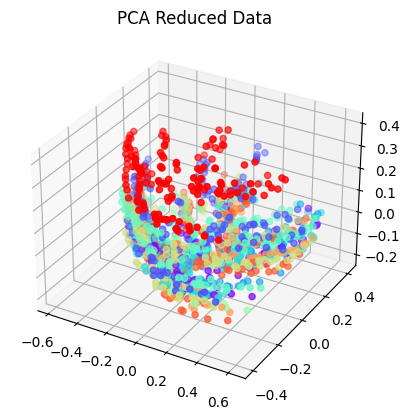

In [44]:
filepath = 'Q2 Dataset\dataset.csv'
data = load_and_preprocess_dataset(filepath)

# Split the dataset
X_train, X_test, y_train, y_test = split_dataset(data)

# Train and evaluate classifiers
knn_accuracy, svm_accuracy, gnb_accuracy = train_and_evaluate(X_train, y_train, X_test, y_test)
print(f'K-NN Accuracy: {knn_accuracy}, SVM Accuracy: {svm_accuracy}, GNB Accuracy: {gnb_accuracy}')

# PCA and visualization
pca_and_visualization(X_train, y_train)